# Model Creation

### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# Importing the augmented dataset

In [2]:
dataset= pd.read_csv('data/credit_card_fraud_dataset_after_smote.csv')
dataset.head()

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,age,is_fraud
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0.310811,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0.756757,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0.459459,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0.459459,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0.472973,0


In [3]:
dataset.shape

(481437, 37)

In [4]:
X_smote= dataset.drop('is_fraud', axis=1)
y_smote= dataset.is_fraud

# IMPLEMENTATION OF THE MODELS

## 1. Logistic Regression

Here we are doing cross validation for the dataset instead of simply splitting it into train and test partitions.

### Cross-Validation using k-Folds

In machine learning, when we're evaluating our models, it's crucial to ensure that our assessment is robust and not biased by the specific train-test split we choose. One way to achieve this is through cross-validation, specifically k-fold cross-validation.

### What is k-Fold Cross-Validation?

In k-fold cross-validation, the dataset is divided into k subsets, or "folds," of approximately equal size. The model is then trained and evaluated k times, using a different fold for evaluation each time while the remaining k-1 folds are used for training. This process ensures that every data point is used for both training and validation, providing a more reliable estimate of the model's performance.

### Advantages of k-Fold Cross-Validation:

1. **Robustness:** By rotating through different subsets of the data for training and validation, k-fold cross-validation helps mitigate the risk of overfitting to any particular subset.

2. **Better Accuracy Estimation:** Since the model is trained and tested on multiple subsets of the data, the resulting accuracy estimate is likely to be more representative of the model's true performance on unseen data.

3. **Optimized Hyperparameter Tuning:** When tuning hyperparameters or comparing different models, k-fold cross-validation allows for a more thorough and fair evaluation, as it provides multiple performance metrics for each configuration.


### a. Without Hyper Parameter Tuning

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
logistic_model = LogisticRegression()

# Fit the classifier
logistic_model.fit(X_smote, y_smote)

LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score

# Perform cross-validation to get cross-validated predictions
y_pred_cv = cross_val_predict(logistic_model, X_smote, y_smote, cv=5)

# Calculate cross-validation scores
scores = cross_val_score(logistic_model, X_smote, y_smote, cv=5, scoring='accuracy')

# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy : .2f}')

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_smote, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy : .2f}')

Mean Accuracy:  0.83
Cross-Validation Accuracy:  0.83


Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.90      0.88    320958
           1       0.77      0.71      0.74    160479

    accuracy                           0.83    481437
   macro avg       0.82      0.80      0.81    481437
weighted avg       0.83      0.83      0.83    481437


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,287464,33494
Actual Positive,46472,114007


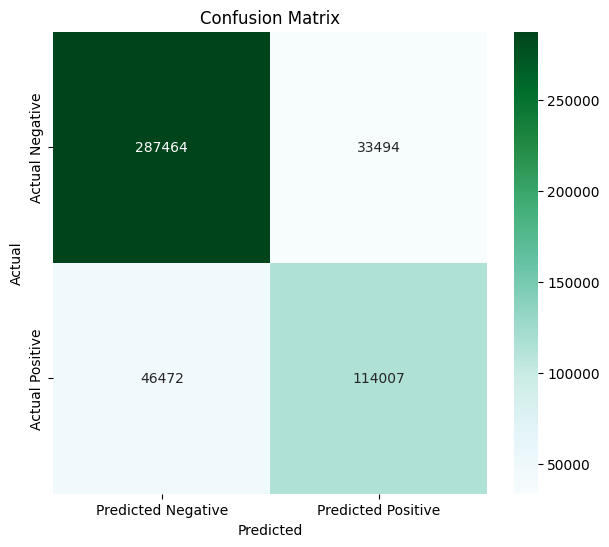

In [7]:
# Print classification report for cross-validated predictions
classification_rep = classification_report(y_smote, y_pred_cv)
print("Classification Report: \n\n {}".format(classification_rep))

# Create a confusion matrix for cross-validated predictions
confusion_mat = confusion_matrix(y_smote, y_pred_cv)

# Convert confusion matrix to DataFrame for better formatting and display
confusion_df = pd.DataFrame(confusion_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Display the confusion matrix
print("\nConfusion Matrix:")
display(confusion_df)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_df, annot=True, fmt="g", cmap='BuGn') #fmt g is to show the entire number without the e term
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The `classification_report` function from the `sklearn.metrics` module is used to generate a report that shows some of the main classification metrics. The output of this function includes precision, recall, and F1-score for each class, as well as the averages of these metrics.

Here's what each of these terms means:

- **Precision**: Precision is the fraction of relevant instances among the retrieved instances. In other words, it answers the question: What proportion of positive identifications was actually correct? It is defined as the number of true positives (TP) divided by the sum of true positives and false positives (FP). A model that produces no false positives has a precision of 1.0.

- **Recall**: Also known as sensitivity or the true positive rate, recall is the fraction of relevant instances that were retrieved. It answers the question: What proportion of actual positives was identified correctly? It is defined as the number of true positives (TP) divided by the sum of true positives and false negatives (FN). A model that produces no false negatives has a recall of 1.0.

- **F1-Score**: The F1 score is a measure of a model's accuracy that takes both precision and recall into account. It is the harmonic mean of precision and recall, providing a balance between the two. The F1 score is especially useful in situations where the positive class is much smaller than the negative class, which is often the case in real-world problems.

A **Confusion Matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

The confusion matrix itself is relatively simple to understand, and some of the basic terminology is provided below:

- **True Positives (TP)**: These are cases in which we predicted yes (the digit), and the actual output was also yes (the digit).
- **True Negatives (TN)**: We predicted no, and the actual output was no.
- **False Positives (FP)**: We predicted yes, but the actual output was no. Also known as "Type I error".
- **False Negatives (FN)**: We predicted no, but the actual output was yes. Also known as "Type II error".

### b. With Hyper Parameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.0001, .001, .01, .1, 1, 10, 100]
}

- **penalty**: This parameter specifies the type of regularization to be applied on the model. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function that the model optimizes. The options are:
    - **'l1'**: Lasso regularization. This adds a penalty equal to the absolute value of the magnitude of coefficients.
    - **'l2'**: Ridge regularization. This adds a penalty equal to the square of the magnitude of coefficients.
    - **'elasticnet'**: This is a combination of L1 and L2 regularization. It adds a penalty term that is a mix of both L1 and L2 penalties.
    - **'none'**: No regularization is applied.

- **C**: This is the inverse of regularization strength. Smaller values specify stronger regularization. So, by varying 'C' in a logarithmic space between 0.0001 and 10000 (as done with `np.logspace(-4, 4, 20)`), we're trying a wide range of regularization strengths in the grid search.

- **solver**: This parameter specifies the algorithm to be used in the optimization problem. The options are:
    - **'newton-cg'**: Newton's method for optimization.
    - **'lbfgs'**: Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. This is the default option
    - **'liblinear'**: A library for large linear classification that uses a coordinate descent algorithm.
    - **'sag'**: Stands for Stochastic Average Gradient descent. It uses a random sample of previous gradient values.
    - **'saga'**: Stands for Stochastic Average Gradient descent with 'amoritized' variance reduction. It is a variant of 'sag' that also supports the non-smooth penalty='l1' option (i.e., L1 regularization).

The solver parameter specifies the optimization algorithm used to minimize the cost function. D

- **max_iter**: This is the maximum number of iterations for the solvers to converge. If the solver doesn't converge within this number of iterations, it will stop and return a warning. By specifying [100, 1000, 2500, 5000], we're allowing the grid search to try different limits for the number of iterations.

**Here solvers and max_iter are not optimised due to technical constraints**

In [9]:
# Create a base model
logistic_model = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator= logistic_model, param_grid= param_grid, cv= 5, scoring= 'accuracy', verbose= 2) 
#verbose 2 is to see the progress messages of the gridserach

# Fit the grid search to the data
grid_search.fit(X_smote, y_smote)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l1; total time=   0.0s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.5s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.5s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.5s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.5s
[CV] END ...............................C=0.0001, penalty=l2; total time=   0.5s
[CV] END .......................C=0.0001, penalty=elasticnet; total time=   0.0s
[CV] END .......................C=0.0001, penal

In [10]:
# Train and predict using the model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_smote, y_smote)
y_pred_cv_best = cross_val_predict(best_model, X_smote, y_smote, cv=5)

In [11]:
# Calculate the cross-validation accuracy score for the model with the best parameters
cross_val_accuracy_best = accuracy_score(y_smote, y_pred_cv_best)
print(f'Cross-Validation Accuracy (Best Model): {cross_val_accuracy_best : .2f}')

Cross-Validation Accuracy (Best Model):  0.83


Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.90      0.88    320958
           1       0.77      0.71      0.74    160479

    accuracy                           0.83    481437
   macro avg       0.82      0.80      0.81    481437
weighted avg       0.83      0.83      0.83    481437


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,287922,33036
Actual Positive,46909,113570


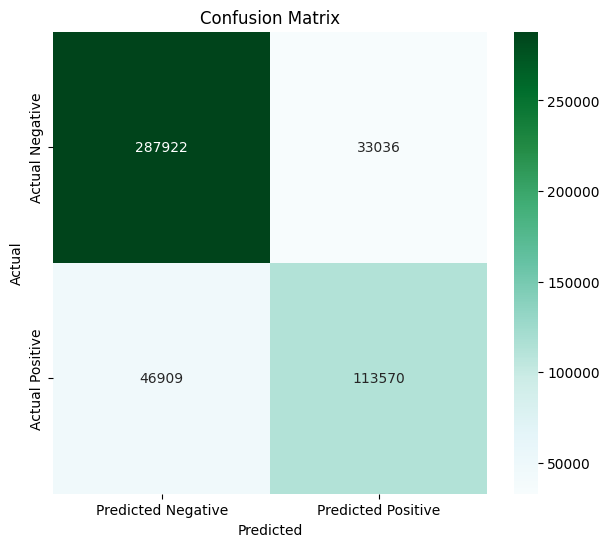

In [12]:
# Print classification report for cross-validated predictions
classification_rep = classification_report(y_smote, y_pred_cv_best)
print("Classification Report: \n\n {}".format(classification_rep))

# Create a confusion matrix for cross-validated predictions
confusion_mat = confusion_matrix(y_smote, y_pred_cv_best)

# Convert confusion matrix to DataFrame for better formatting and display
confusion_df = pd.DataFrame(confusion_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Display the confusion matrix
print("\nConfusion Matrix:")
display(confusion_df)

# Plot the confusion matrix

print('\n')
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_df, annot=True, fmt="g", cmap='BuGn') #fmt g is to show the entire number without the e term
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('\n')

In [13]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_smote, y_pred_cv)
roc_auc = auc(fpr, tpr)
roc_auc

0.8030303030303031

An ROC curve is a commonly used way to visualize the performance of a binary classifier. 

- **True Positive Rate (TPR)**, or recall, is the ratio of true positive predictions to the actual number of positive cases. It is calculated as:
$$
\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$
TPR is a measure of the model's ability to correctly identify all actual positives.

- **False Positive Rate (FPR)** 

This sees out of all the actually negative classes, how many is our model says as false positive
The FPR is a measure of how many negative results are incorrectly identified as positive. It is calculated as the number of false positives divided by the total number of actual negatives (true negatives plus false positives). In mathematical terms:
$$
\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
$$

- **Objective** 

The goal is to maximize TPR (aiming for a value of 1) while minimizing FPR (aiming for a value of 0). Both TPR and FPR range between 0 and 1.

- **Area Under the Curve (AUC)** 

AUC represents the area under the ROC curve and ranges from 0 to 1. A larger AUC value indicates a better-performing model.

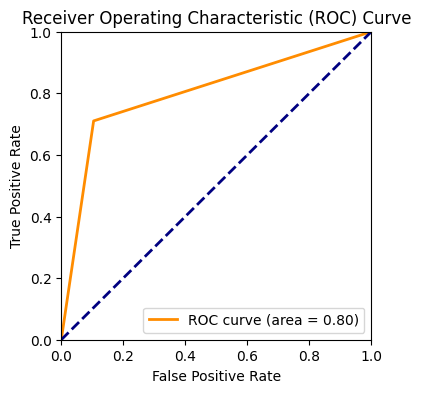

In [14]:
# Plot ROC curve
plt.figure(figsize=(4, 4)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #lw sets line width
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Randomly selecting a row and making prediction
X= X_smote
y= y_smote

random_row_no= np.random.randint(1, X.shape[0])

row_to_predict = X.iloc[random_row_no, : ].values.reshape(1, -1)  # Reshape to 2D array

# Use the trained model to predict the class for the scaled input
predicted_class = best_model.predict(row_to_predict)

# Print the predicted class
print('Selected Row Number: {}'.format(random_row_no))
print("Predicted Class: {} ".format(predicted_class[0]))
print("Actual Class: {} ".format(y[random_row_no]))

Selected Row Number: 299099
Predicted Class: 0 
Actual Class: 0 


In [16]:
# Randomly selecting a row and making prediction
random_row_no= np.random.randint(1, X.shape[0])

row_to_predict = X.iloc[random_row_no, : ].values.reshape(1, -1)  # Reshape to 2D array

# Use the trained model to predict the class for the scaled input
predicted_class = best_model.predict(row_to_predict)

# Print the predicted class
print('Selected Row Number: {}'.format(random_row_no))
print("Predicted Class: {} ".format(predicted_class[0]))
print("Actual Class: {} ".format(y[random_row_no]))

Selected Row Number: 38670
Predicted Class: 0 
Actual Class: 0 


In [17]:
from joblib import dump

# Save the model to a file
dump(logistic_model, 'models/logistic_regression_without_hyperparameter_tuning.pkl')
print("Logistic regression model saved successfully.")

Logistic regression model saved successfully.


In [18]:
from joblib import dump

# Save the model to a file
dump(best_model, 'models/logistic_regression_after_hyperparameter_tuning.pkl')
print("Best Logistic regression model saved successfully.")

Best Logistic regression model saved successfully.


## 2. K-NEAREST NEIGHBOR (KNN) MODEL

### a. Without hyper-parameter tuning

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Define K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Fit the classifier
knn_model.fit(X_smote, y_smote)

KNeighborsClassifier()

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

# Perform cross-validation to get cross-validated predictions
y_pred_cv = cross_val_predict(knn_model, X_smote, y_smote, cv= 5, verbose= 2)

# Calculate cross-validation scores
scores = cross_val_score(knn_model, X_smote, y_smote, cv= 5, scoring= 'accuracy', verbose= 2)

# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy : .2f}')

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_smote, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy : .2f}')

[CV] END .................................................... total time=  29.9s
[CV] END .................................................... total time=  29.9s
[CV] END .................................................... total time=  30.1s
[CV] END .................................................... total time=  29.8s
[CV] END .................................................... total time=  30.4s
Mean Accuracy:  1.00
Cross-Validation Accuracy:  1.00


Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    320958
           1       0.99      1.00      1.00    160479

    accuracy                           1.00    481437
   macro avg       1.00      1.00      1.00    481437
weighted avg       1.00      1.00      1.00    481437


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,319803,1155
Actual Positive,257,160222


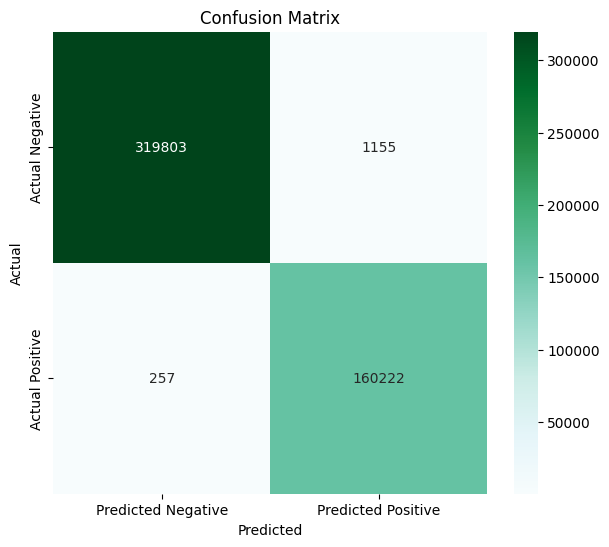

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report for cross-validated predictions
classification_rep = classification_report(y_smote, y_pred_cv)
print("Classification Report: \n\n {}".format(classification_rep))

# Create a confusion matrix for cross-validated predictions
confusion_mat = confusion_matrix(y_smote, y_pred_cv)

# Convert confusion matrix to DataFrame for better formatting and display
confusion_df = pd.DataFrame(confusion_mat, index= ['Actual Negative', 'Actual Positive'], columns= ['Predicted Negative', 'Predicted Positive'])

# Display the confusion matrix
print("\nConfusion Matrix:")
display(confusion_df)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_df, annot= True, fmt= "g", cmap= 'BuGn') #fmt g is to show the entire number without the e term
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### b. With hyper-parameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter values that should be searched
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 13],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] #1 for manhattan distance and 2 for euclidean distance
}


# Instantiate the grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv= 5, scoring= 'accuracy', n_jobs= -1, verbose= 3)

# Fit the grid with data
grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

- **n_neighbors**: The number of neighbors to consider when making a prediction. We're trying all values from 1 to 30.
- **weights**: Controls how the classification decision is made. The options are 'uniform' (all points in each neighborhood are weighted equally) and 'distance' (points are weighted by the inverse of their distance, so closer points have a greater influence).
- **p**: The power parameter for the Minkowski metric. When `p=1`, this is equivalent to using manhattan_distance (l1), and `p=2` corresponds to using euclidean_distance (l2). We're trying both options in our grid search.
- **cv**: The number of cross-validation folds to use. Cross-validation is a way to estimate the generalization performance of a model, by splitting the data into `k` folds and doing `k` iterations where each fold is used once as the validation set.
- **scoring**: The scoring metric to use. In our case, we're using 'accuracy', which is the fraction of correctly classified samples.
- **n_jobs**: The number of jobs to run in parallel. `-1` means using all processors.


In [23]:
# Examine the best model
print('Best Score: {}'.format(grid.best_score_))
print('Best Parameter values: {}'.format(grid.best_params_))

Best Score: 0.9982240703027919
Best Parameter values: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [24]:
best_params= grid.best_params_

best_knn_classifer= KNeighborsClassifier(n_neighbors= best_params.get('n_neighbors'), p= best_params.get('p'), weights= best_params.get('weights'))
best_knn_classifer.fit(X_smote, y_smote)                           

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

# Perform cross-validation to get cross-validated predictions
y_pred_cv = cross_val_predict(best_knn_classifer, X_smote, y_smote, cv=5, verbose=2)

# Calculate cross-validation scores
scores = cross_val_score(best_knn_classifer, X_smote, y_smote, cv=5, scoring='accuracy', verbose= 2)

# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy : .2f}')

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_smote, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy : .2f}')

[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 1.6min
Mean Accuracy:  1.00
Cross-Validation Accuracy:  1.00


Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    320958
           1       1.00      1.00      1.00    160479

    accuracy                           1.00    481437
   macro avg       1.00      1.00      1.00    481437
weighted avg       1.00      1.00      1.00    481437


Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,320433,525
Actual Positive,330,160149


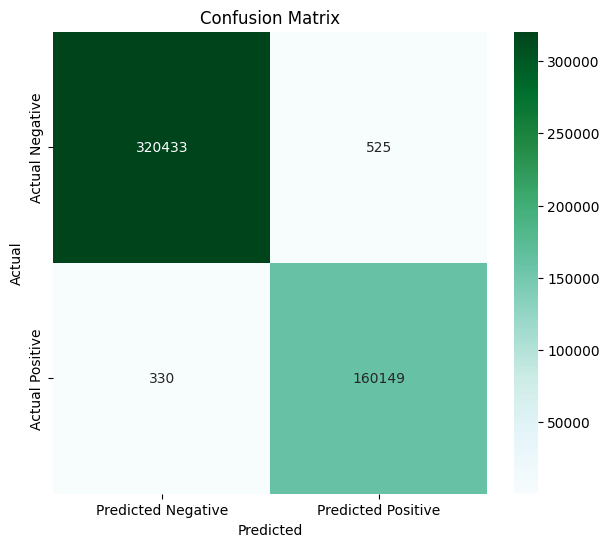

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report for cross-validated predictions
classification_rep = classification_report(y_smote, y_pred_cv)
print("Classification Report: \n\n {}".format(classification_rep))

# Create a confusion matrix for cross-validated predictions
confusion_mat = confusion_matrix(y_smote, y_pred_cv)

# Convert confusion matrix to DataFrame for better formatting and display
confusion_df = pd.DataFrame(confusion_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Display the confusion matrix
print("\nConfusion Matrix:")
display(confusion_df)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_df, annot=True, fmt="g", cmap='BuGn') #fmt g is to show the entire number without the e term
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_smote, y_pred_cv)
roc_auc = auc(fpr, tpr)

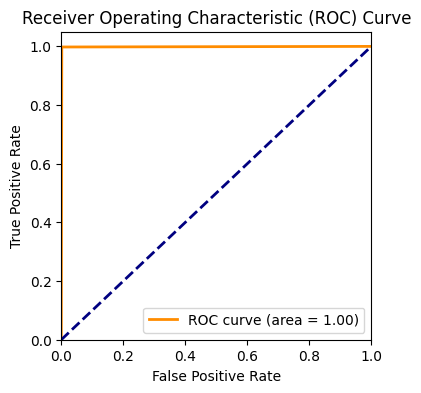

In [28]:
# Plot ROC curve
plt.figure(figsize=(4, 4)) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
# Randomly selecting a row and making prediction
random_row_no= np.random.randint(1, X.shape[0])

row_to_predict = X.iloc[random_row_no, : ].values.reshape(1, -1)  # Reshape to 2D array

# Use the trained model to predict the class for the scaled input
predicted_class = best_knn_classifer.predict(row_to_predict)

# Print the predicted class
print('Selected Row Number: {}'.format(random_row_no))
print("Predicted Class: {} ".format(predicted_class[0]))
print("Actual Class: {} ".format(y[random_row_no]))

Selected Row Number: 304772
Predicted Class: 0 
Actual Class: 0 


In [30]:
# Randomly selecting a row and making prediction
random_row_no= np.random.randint(1, X.shape[0])

row_to_predict = X.iloc[random_row_no, : ].values.reshape(1, -1)  # Reshape to 2D array

# Use the trained model to predict the class for the scaled input
predicted_class = best_knn_classifer.predict(row_to_predict)

# Print the predicted class
print('Selected Row Number: {}'.format(random_row_no))
print("Predicted Class: {} ".format(predicted_class[0]))
print("Actual Class: {} ".format(y[random_row_no]))

Selected Row Number: 231402
Predicted Class: 0 
Actual Class: 0 


In [31]:
from joblib import dump

# Save the model to a file
dump(knn_model, 'models/knn_classifier_without_hyperparameter_tuning.pkl')
print("knn classifier saved successfully!")

knn classifier saved successfully!


In [32]:
from joblib import dump

# Save the model to a file
dump(best_knn_classifer, 'models/knn_classifier_after_hyperparameter_tuning.pkl')
print("Best Logistic knn classifier saved successfully!")

Best Logistic knn classifier saved successfully!


## 3. Naive Bayes 

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have your data X_smote and corresponding labels y_smote

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define Naive Bayes model (Gaussian Naive Bayes in this case)
naive_bayes_model = GaussianNB()

# Train the Naive Bayes classifier
naive_bayes_model.fit(X_train, y_train)

# Test the classifier
y_pred = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes model:", accuracy)


Accuracy of Naive Bayes model: 0.7912824027916251


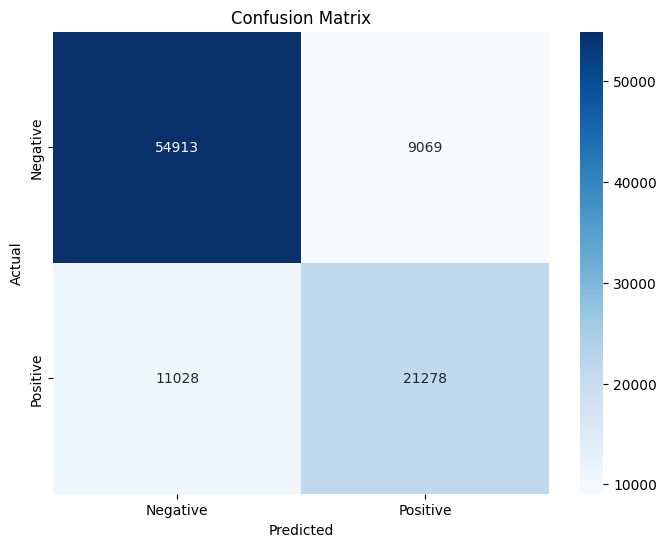

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Mean Accuracy:  0.79
Cross-Validation Accuracy:  0.79


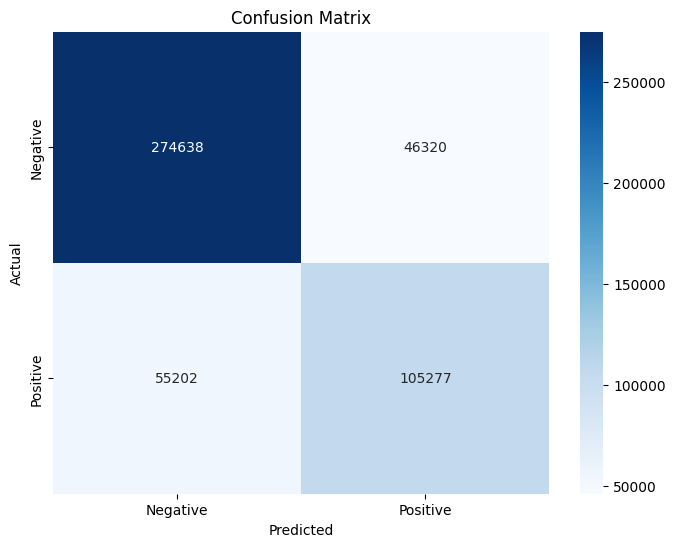

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84    320958
           1       0.69      0.66      0.67    160479

    accuracy                           0.79    481437
   macro avg       0.76      0.76      0.76    481437
weighted avg       0.79      0.79      0.79    481437



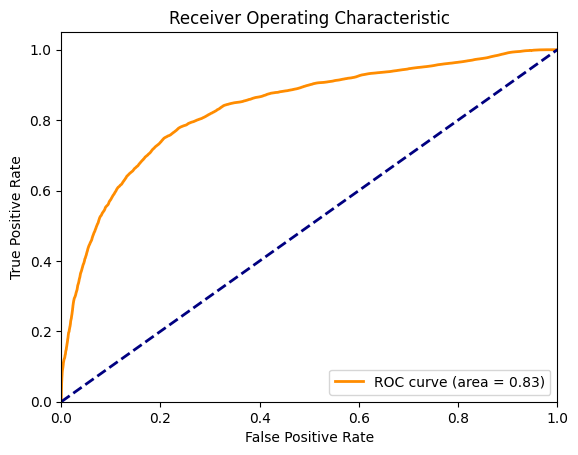

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_smote and y_smote are defined and imported

# Define Naive Bayes model (Gaussian Naive Bayes in this case)
naive_bayes_model = GaussianNB()

# Perform cross-validation to get cross-validated predictions
y_pred_cv = cross_val_predict(naive_bayes_model, X_smote, y_smote, cv=5)

# Calculate cross-validation scores
scores = cross_val_score(naive_bayes_model, X_smote, y_smote, cv=5, scoring='accuracy')

# Calculate the average accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f'Mean Accuracy: {mean_accuracy : .2f}')

# Calculate the cross-validation accuracy score
cross_val_accuracy = accuracy_score(y_smote, y_pred_cv)
print(f'Cross-Validation Accuracy: {cross_val_accuracy : .2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_smote, y_pred_cv)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_smote, y_pred_cv)
print("Classification Report:")
print(class_report)

# Plot ROC curve
y_scores = cross_val_predict(naive_bayes_model, X_smote, y_smote, cv=5, method="predict_proba")[:, 1]
fpr, tpr, thresholds = roc_curve(y_smote, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [36]:
from joblib import dump

# Save the model to a file
dump(naive_bayes_model, 'models/naive_bayes_model.pkl')
print("Naive Bayes model saved successfully!")

Naive Bayes model saved successfully!
